In [1]:
import matplotlib.pyplot as plt
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

In [2]:
import math
def Exp(alpha = 1):
    random = [math.log(alpha/rng())/alpha for i in range(1000)]
    return random
Exp()
plt.hist(Exp(13), density=True)
plt.show()

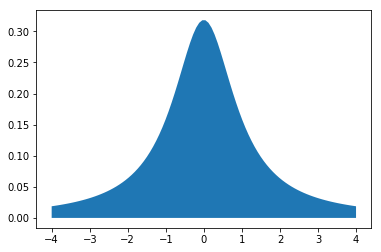

In [3]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

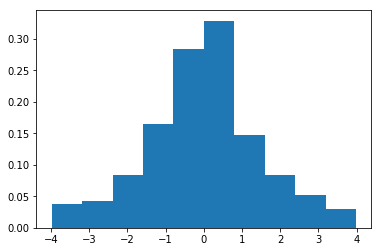

In [4]:
y = [(rng()-0.5)*8 for i in range(10000)]
z = [(rng()) for i in range(10000)]
A = []
for j in range(10000):
    if z[j] < dist.pdf(y[j]):
        A.append(y[j])
plt.hist(A, density=True)
plt.show()

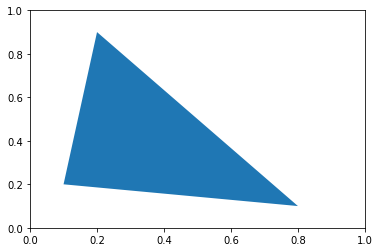

In [5]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

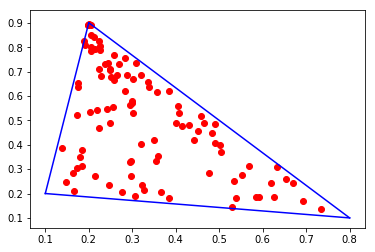

In [6]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sx = np.random.uniform(0,1,100)
sy = np.random.uniform(0,1,100)
s2x = 0.7*sx*(1-sy) + 0.1*sy + 0.1 
s2y = -0.1*sx*(1-sy) + 0.7*sy + 0.2 
plt.scatter(s2x,s2y,c = 'r')
plt.plot([0.1,0.8],[0.2,0.1],c = 'b')
plt.plot([0.1,0.2],[0.2,0.9],c = 'b')
plt.plot([0.2,0.8],[0.9,0.1],c = 'b')
plt.show()

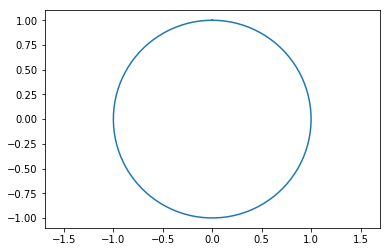

In [7]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

In [8]:
from scipy import stats
import numpy as np
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
sx = np.random.uniform(-1,10,100)
sy = np.random.uniform(-1,10,100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
length = np.sqrt(np.random.uniform(0, 1,100))
angle = np.pi * np.random.uniform(0, 2,100)

x = length * np.cos(angle)
y = length * np.sin(angle)
plt.scatter(x,y, c = 'r')
plt.show()

In [9]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

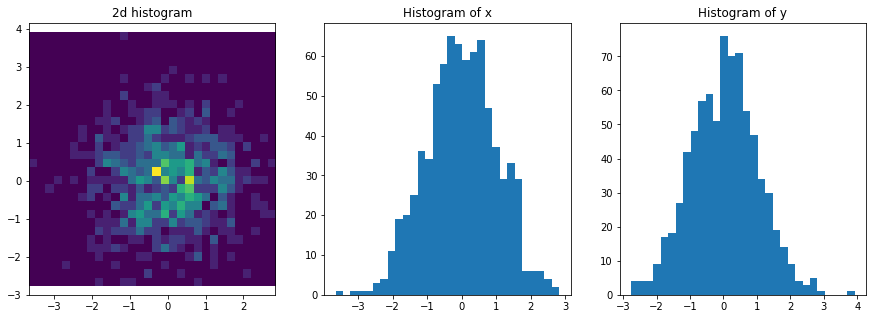

In [10]:
n = 1000
u1, u2 = (np.random.rand(2, n)-0.5)*2
s = u1**2+u2**2
x=[]
y=[]
for i in range(1000):
    if (s[i]!=0) and (s[i]<1):
        x.append(u1[i] * np.sqrt(-2*np.log(s[i])/s[i]))
        y.append(u2[i] * np.sqrt(-2*np.log(s[i])/s[i]))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.full_like(narr, 'red', dtype='U5')
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c = colors.ravel())
    plt.show()

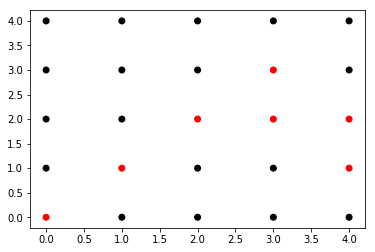

In [12]:
size = 5
narr = np.random.choice([True, False], size = (size, size))
plot_grid(narr)

In [13]:
mean = 0
for i in range(1000):
    narr = np.random.choice([False], size = (size, size))
    for j in range(size**3):
        hor = int(rng()*size)
        vert = int(rng()*size)
        left = 0
        right = 0
        down = 0
        up = 0
        if (hor != 0 and narr[hor-1][vert] == 1): left = 1
        if (hor != size-1 and narr[hor+1][vert] == 1): right = 1
        if (vert != 0 and narr[hor][vert-1] == 1): down = 1
        if (vert != size-1 and narr[hor][vert+1] == 1): up = 1
        if (right != 1 and left != 1 and up != 1 and down != 1 and rng() > 0.5):
            narr[hor][vert] = True
    mean = mean + np.sum(narr)
print(mean/1000)

9.678


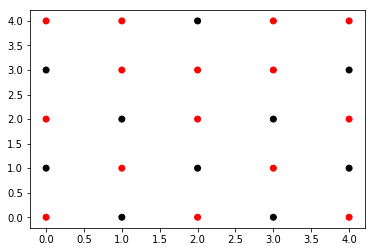

In [14]:
#Получившаяся Марковская цепь неприводима, так как мы можем достичь все конфигурации
#за конечное время (через нулевую конфигурацию). Также она непериодическая, так как может не измениться за шаг.
#Теперь если мы покажем обратимость, то докажем и стационарность.
#Докажем для 2 конфигураций ξ и ξ', что µG(ξ)Pξ,ξ' = µG(ξ')P(ξ',ξ). Из этого будет следовать стационарность распределения.
#1) Если ξ = ξ', то верно.
#2) Если ξ и ξ' отличаются более чем в двух вершинах, то тоже верно, так как алгоритм меняет не более одной вершины за шаг.
#3) Если ξ и ξ' отличаются в 1 вершине, то все соседи ξ and ξ равны 0, а тогда обе части равенства равны 1/(2Z(G)*V).
plot_grid(narr)